In [2]:
import pandas as pd
import numpy as np

In [3]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [4]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


###### Checando posições NCM recorrentes

Por meio do Jupyer Notebook "03_análises_diversas_e_representações_gráficas - PARTE 01", constata-se que a maior quantidade de mercadoria importada classifica-se na posição 8532. De todo modo, para fins de implementação do modelo, entende-se que é desejável não apenas um código que tenha sido importado em quantidade, mas, sobretudo, que tenha sido recorrente. Segue, portanto, consulta à posição da NCM em que os códigos NCM foram mais recorrentes.

In [5]:
# testa capítulos mais recorrentes
df["POSIÇÃO_NCM"] = df["CO_NCM"].astype(str).str[:4]

In [6]:
df["POSIÇÃO_NCM"].value_counts()

8708    51461
8536    43444
8481    36563
8483    35341
7318    34623
        ...  
4404        1
3019        1
3054        1
2069        1
3051        1
Name: POSIÇÃO_NCM, Length: 1263, dtype: int64

In [7]:
# já tendo sido analisada - em outro Jupyter Notebook - a posição 8708, segue análise da segunda posição mais recorrente, que é a 8536
df1=df[df["POSIÇÃO_NCM"]=="8536"]

In [8]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,POSIÇÃO_NCM
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405,8536
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405,8536
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405,8536
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405,8536
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713,8536
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713,8536
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713,8536
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,8536


In [9]:
df1.drop(columns="POSIÇÃO_NCM", inplace=True)

D:\ANACONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405
...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713


In [11]:
# checando quais os códigos NCM mais recorrentes
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
9,85365090,8873
20,85369090,7697
4,85364100,3819
0,85361000,3550
17,85369040,3357
5,85364900,3271
12,85366990,2951
1,85362000,2091
14,85369010,1949
3,85363090,1611


In [12]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [13]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [14]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [15]:
g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 9 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO_NCM           21 non-null     int64  
 1   contagem         21 non-null     int64  
 2   % CO_NCM         21 non-null     float64
 3   % CO_NCM ACUMUL  21 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 840.0 bytes


In [16]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 30 códigos NCM dentre os 45.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
9,85365090,8873,0.204240,0.204240
20,85369090,7697,0.177171,0.381411
4,85364100,3819,0.087906,0.469317
0,85361000,3550,0.081714,0.551031
17,85369040,3357,0.077272,0.628303
5,85364900,3271,0.075292,0.703595
12,85366990,2951,0.067927,0.771522
1,85362000,2091,0.048131,0.819653
14,85369010,1949,0.044862,0.864515
3,85363090,1611,0.037082,0.901597


In [17]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
11,85366910,840,0.019335,0.964207
16,85369030,592,0.013627,0.977834
8,85365030,321,0.007389,0.985222
18,85369050,240,0.005524,0.990747
2,85363010,167,0.003844,0.994591
6,85365010,114,0.002624,0.997215
19,85369060,43,0.000990,0.998205
15,85369020,42,0.000967,0.999171
7,85365020,36,0.000829,1.000000


In [18]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [19]:
mask=df1['CO_NCM'].isin(idx)
mask

25         False
121        False
122        False
197        False
291        False
           ...  
1764250    False
1764319    False
1764371     True
1764418    False
1764428    False
Name: CO_NCM, Length: 43444, dtype: bool

In [20]:
df1["CO_NCM_final"]=df1["CO_NCM"]

<ipython-input-20-e6965bd59fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_NCM_final"]=df1["CO_NCM"]


In [21]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [22]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405,85362000
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405,85365090
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405,85366990
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405,85366990
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405,85369090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713,85369010
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713,85365090
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713,99999999
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,85369010


In [23]:
df1["CO_NCM_final"].value_counts()

85365090    8873
85369090    7697
85364100    3819
85361000    3550
85369040    3357
85364900    3271
85366990    2951
99999999    2395
85362000    2091
85369010    1949
85363090    1611
85366100     960
85367000     920
Name: CO_NCM_final, dtype: int64

###### Checando códigos UNID MED EST (CO_UNID) recorrentes

In [24]:
g1=df1.groupby(['CO_UNID']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_UNID,contagem
0,11,43444


In [25]:
df1["CO_UNID_final"]=df1["CO_UNID"]

<ipython-input-25-043d6a9cfec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_UNID_final"]=df1["CO_UNID"]


In [26]:
# no caso corrente não há CO_UNID minoritários para serem agrupados em categorial residual. Portanto, não se executará o código a seguir.
#mask=df1['CO_UNID']!=11
#mask

In [27]:
#df1.loc[mask, "CO_UNID_final"] = 99

In [28]:
df1["CO_UNID_final"].value_counts()

11    43444
Name: CO_UNID_final, dtype: int64

###### Checando países (CO_PAIS) recorrentes

In [29]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
21,160,5643
37,249,4004
2,23,3424
55,386,2097
57,399,2068
...,...,...
51,372,1
56,391,1
79,580,1
73,501,1


In [30]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [31]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [32]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [33]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
21,160,5643,0.129891,0.129891
37,249,4004,0.092165,0.222056
2,23,3424,0.078814,0.300870
55,386,2097,0.048269,0.349139
57,399,2068,0.047602,0.396741


In [34]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_PAIS, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 40 países dentre os 114.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 21 to 52
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           40 non-null     int64  
 1   contagem          40 non-null     int64  
 2   % CO_PAIS         40 non-null     float64
 3   % CO_PAIS ACUMUL  40 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.6 KB


In [35]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
15,105,198,0.004558,0.951570
89,647,185,0.004258,0.955828
75,538,164,0.003775,0.959603
69,467,153,0.003522,0.963125
54,383,137,0.003153,0.966278
...,...,...,...,...
51,372,1,0.000023,0.999908
56,391,1,0.000023,0.999931
79,580,1,0.000023,0.999954
73,501,1,0.000023,0.999977


In [36]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [37]:
mask=df1['CO_PAIS'].isin(idx)
mask

25         False
121        False
122        False
197        False
291        False
           ...  
1764250    False
1764319    False
1764371     True
1764418    False
1764428    False
Name: CO_PAIS, Length: 43444, dtype: bool

In [38]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

<ipython-input-38-b9c243d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_PAIS_final"]=df1["CO_PAIS"]


In [39]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [40]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405,85362000,11,160
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405,85365090,11,23
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405,85366990,11,493
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405,85366990,11,23
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405,85369090,11,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713,85369010,11,249
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713,85365090,11,858
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713,99999999,11,999
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,85369010,11,776


In [41]:
df1["CO_PAIS_final"].value_counts()

160    5643
249    4004
23     3424
999    2302
386    2097
399    2068
493    1927
275    1715
161    1583
190    1184
245    1123
767    1082
791     990
628     947
603     858
361     811
72      753
355     749
455     702
764     691
776     660
670     639
351     616
365     597
149     540
573     505
267     491
607     436
87      400
827     399
271     399
820     395
858     389
741     371
247     364
232     354
111     278
474     250
63      240
246     237
375     231
Name: CO_PAIS_final, dtype: int64

###### Checando unidades da RFB (CO_URF) recorrentes

In [42]:
g1=df1.groupby(['CO_URF']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_URF,contagem
28,817600,8677
30,817800,7351
29,817700,6518
24,717700,2080
35,917900,1961
19,617700,1577
34,917800,1541
5,227700,1495
49,1017801,1443
40,927800,1337


In [43]:
g1["% CO_URF"] = g1["contagem"]/(g1["contagem"].sum())

In [44]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [45]:
g2["% CO_URF ACUMUL"]=g2["% CO_URF"].cumsum()

In [46]:
g2.head()

,CO_URF,contagem,% CO_URF,% CO_URF ACUMUL
28,817600,8677,0.199728,0.199728
30,817800,7351,0.169206,0.368935
29,817700,6518,0.150032,0.518967
24,717700,2080,0.047878,0.566845
35,917900,1961,0.045139,0.611983


In [47]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_URF, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_URF ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 17 UF dentre as 50.

,CO_URF,contagem,% CO_URF,% CO_URF ACUMUL
28,817600,8677,0.199728,0.199728
30,817800,7351,0.169206,0.368935
29,817700,6518,0.150032,0.518967
24,717700,2080,0.047878,0.566845
35,917900,1961,0.045139,0.611983
19,617700,1577,0.036300,0.648283
34,917800,1541,0.035471,0.683754
5,227700,1495,0.034412,0.718166
49,1017801,1443,0.033215,0.751381
40,927800,1337,0.030775,0.782156


In [48]:
# os 5% que extrapolam o acumulado 95% (além dos indefinidos: CO_URF=0) serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[(g2["% CO_URF ACUMUL"]>0.95) | (g2["CO_URF"]==0)]
g4

,CO_URF,contagem,% CO_URF,% CO_URF ACUMUL
0,0,890,0.020486,0.879822
18,517801,731,0.016826,0.954171
13,417901,346,0.007964,0.962135
9,317901,326,0.007504,0.969639
26,727600,270,0.006215,0.975854
14,417902,184,0.004235,0.980089
15,420154,160,0.003683,0.983772
8,317900,148,0.003407,0.987179
45,1017503,103,0.002371,0.989550
44,1017500,97,0.002233,0.991783


In [49]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_URF"]

In [50]:
mask=df1['CO_URF'].isin(idx)
mask

25         False
121        False
122        False
197        False
291        False
           ...  
1764250    False
1764319    False
1764371    False
1764418    False
1764428    False
Name: CO_URF, Length: 43444, dtype: bool

In [51]:
df1["CO_URF_final"]=df1["CO_URF"]

<ipython-input-51-0ff9bd238ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_URF_final"]=df1["CO_URF"]


In [52]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "CO_URF_final"] = 999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [53]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final,CO_URF_final
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,3.741055,3.884405,85362000,11,160,817800
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,3.741055,3.884405,85365090,11,23,817600
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,3.741055,3.884405,85366990,11,493,817600
197,2019-01,85366990,11,23,MG,4,617700,5,0,160,3.741055,3.884405,85366990,11,23,617700
291,2019-01,85369090,11,767,SE,1,517800,59000,1449,35731,3.741055,3.884405,85369090,11,767,517800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764250,2019-08,85369010,11,249,RS,4,817600,10,0,394,4.019382,3.778713,85369010,11,249,817600
1764319,2019-08,85365090,11,858,SC,4,817600,10,2,467,4.019382,3.778713,85365090,11,858,817600
1764371,2019-08,85365030,11,196,SP,4,817700,15,0,113,4.019382,3.778713,99999999,11,999,817700
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,85369010,11,776,817800


In [54]:
df1["CO_URF_final"].value_counts()

817600     8677
817800     7351
817700     6518
999999     3612
717700     2080
917900     1961
617700     1577
917800     1541
227700     1495
1017801    1443
927800     1337
717600     1257
927700     1145
227600      951
517800      885
1017700     817
717800      797
Name: CO_URF_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [55]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
2,4,26112
1,1,16268
0,0,737
4,7,314
6,10,9
5,9,3
3,5,1


In [56]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [57]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [58]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [59]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
2,4,26112,0.601050,0.601050
1,1,16268,0.374459,0.975509
0,0,737,0.016964,0.992473
4,7,314,0.007228,0.999701
6,10,9,0.000207,0.999908
5,9,3,0.000069,0.999977
3,5,1,0.000023,1.000000


In [60]:
df1["CO_VIA_final"]=df["CO_VIA"]

<ipython-input-60-0653cde63ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_VIA_final"]=df["CO_VIA"]


In [61]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [62]:
df1.loc[mask, "CO_VIA_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [63]:
df1["CO_VIA_final"].value_counts()

4     26112
1     16268
99      750
7       314
Name: CO_VIA_final, dtype: int64

###### No presente Jupyter Notebook a variável UF será substituída pelo código da URF, na tentativa de melhorar o modelo

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [64]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-64-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [65]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'CO_URF_final', 'CO_VIA_final', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [66]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_85364100,NCM_85364900,NCM_85365090,NCM_85366100,NCM_85366990,NCM_85367000,NCM_85369010,NCM_85369040,NCM_85369090,NCM_99999999
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,1,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,1,0,0,0,0,0


In [68]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_85364900,NCM_85365090,NCM_85366100,NCM_85366990,NCM_85367000,NCM_85369010,NCM_85369040,NCM_85369090,NCM_99999999,Un.Med.Est._11
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,1
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,1,0,0,0,0,0,0,0,1
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,1,0,0,0,0,0,1


In [69]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_670,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_820,Pais_827,Pais_858,Pais_999
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_URF_final"],prefix="URF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,URF_817600,URF_817700,URF_817800,URF_917800,URF_917900,URF_927700,URF_927800,URF_999999,URF_1017700,URF_1017801
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,1,0,0,0,0,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,1,0,0,0,0,0,0,0,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,1,0,0,0,0,0,0,0,0,0


In [71]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,URF_917900,URF_927700,URF_927800,URF_999999,URF_1017700,URF_1017801,Modal_1,Modal_4,Modal_7,Modal_99
25,2019-01,85362000,11,160,SP,1,817800,2643776,414413,3654038,...,0,0,0,0,0,0,1,0,0,0
121,2019-01,85365090,11,23,SP,4,817600,69172,4482,552919,...,0,0,0,0,0,0,0,1,0,0
122,2019-01,85366990,11,493,SP,4,817600,215,35,3689,...,0,0,0,0,0,0,0,1,0,0


In [72]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'CO_URF_final', 'CO_VIA_final'])

In [73]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06', 'Mês_2019-07',
       'Mês_2019-08', 'Mês_2019-09', 'Mês_2019-10', 'Mês_2019-11',
       'Mês_2019-12', 'NCM_85361000', 'NCM_85362000', 'NCM_85363090',
       'NCM_85364100', 'NCM_85364900', 'NCM_85365090', 'NCM_85366100',
       'NCM_85366990', 'NCM_85367000', 'NCM_85369010', 'NCM_85369040',
       'NCM_85369090', 'NCM_99999999', 'Un.Med.Est._11', 'Pais_23', 'Pais_63',
       'Pais_72', 'Pais_87', 'Pais_111', 'Pais_149', 'Pais_160', 'Pais_161',
       'Pais_190', 'Pais_232', 'Pais_245', 'Pais_246', 'Pais_247', 'Pais_249',
       'Pais_267', 'Pais_271', 'Pais_275', 'Pais_351', 'Pais_355', 'Pais_361',
       'Pais_365', 'Pais_375', 'Pais_386', 'Pais_399', 'Pais_455', 'Pais_474',
       'Pais_493', 'Pais_573', 'Pais_603', 'Pais_607', 'Pais_628', 'Pais_670',
       'Pais_741', 'Pais_764', 'Pais_767', 'Pais_

In [74]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43444 entries, 25 to 1764428
Data columns (total 92 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QT_ESTAT             43444 non-null  int64  
 1   câmbio_mês_atual     43444 non-null  float64
 2   câmbio_mês_anterior  43444 non-null  float64
 3   VL_FOB/QT_ESTAT      43444 non-null  float64
 4   Mês_2019-01          43444 non-null  uint8  
 5   Mês_2019-02          43444 non-null  uint8  
 6   Mês_2019-03          43444 non-null  uint8  
 7   Mês_2019-04          43444 non-null  uint8  
 8   Mês_2019-05          43444 non-null  uint8  
 9   Mês_2019-06          43444 non-null  uint8  
 10  Mês_2019-07          43444 non-null  uint8  
 11  Mês_2019-08          43444 non-null  uint8  
 12  Mês_2019-09          43444 non-null  uint8  
 13  Mês_2019-10          43444 non-null  uint8  
 14  Mês_2019-11          43444 non-null  uint8  
 15  Mês_2019-12          43444 non-nu

In [75]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values(ascending=False)
correlacoes.head(50)

VL_FOB/QT_ESTAT    1.000000
Pais_628           0.058523
Pais_149           0.052824
NCM_85364900       0.050266
URF_999999         0.046672
URF_717700         0.041568
Pais_249           0.034206
URF_717600         0.033394
Pais_160           0.031779
Pais_275           0.029562
NCM_85369040       0.028280
Modal_1            0.025335
NCM_85361000       0.025070
NCM_85362000       0.023879
Modal_99           0.022813
NCM_85367000       0.021765
URF_817800         0.021179
Modal_4            0.020154
Pais_161           0.018864
NCM_85363090       0.018830
Pais_271           0.017542
NCM_85364100       0.016240
URF_917800         0.015550
URF_227600         0.015521
NCM_85369010       0.014782
Pais_493           0.014400
Pais_399           0.014353
URF_717800         0.013938
URF_1017801        0.012895
Pais_764           0.012496
Mês_2019-06        0.012084
Pais_776           0.011925
URF_817700         0.011811
URF_927700         0.011602
URF_1017700        0.011473
Pais_791           0

In [76]:
# Identificando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
(correlacoes[correlacoes >= 0.02]).index

Index(['VL_FOB/QT_ESTAT', 'Pais_628', 'Pais_149', 'NCM_85364900', 'URF_999999',
       'URF_717700', 'Pais_249', 'URF_717600', 'Pais_160', 'Pais_275',
       'NCM_85369040', 'Modal_1', 'NCM_85361000', 'NCM_85362000', 'Modal_99',
       'NCM_85367000', 'URF_817800', 'Modal_4'],
      dtype='object')

In [77]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
df2 = df_encoded[(correlacoes[correlacoes >= 0.02]).index]

In [78]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

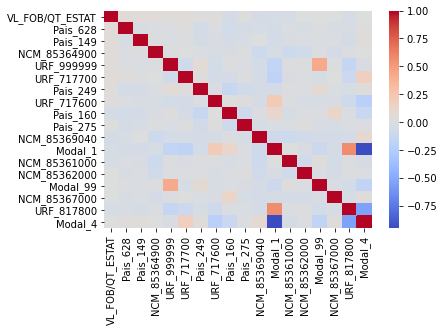

In [79]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

In [80]:
#Considerando que as Modal 1 e Modal 4 estão fortemente relacionadas, irei retirar uma delas antes da elaboração do modelo
df2=df2.drop(columns="Modal_1")

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [81]:
df2.columns

Index(['VL_FOB/QT_ESTAT', 'Pais_628', 'Pais_149', 'NCM_85364900', 'URF_999999',
       'URF_717700', 'Pais_249', 'URF_717600', 'Pais_160', 'Pais_275',
       'NCM_85369040', 'NCM_85361000', 'NCM_85362000', 'Modal_99',
       'NCM_85367000', 'URF_817800', 'Modal_4'],
      dtype='object')

In [84]:
x = df2[['Pais_628', 'Pais_149', 'NCM_85364900', 'URF_999999',
       'URF_717700', 'Pais_249', 'URF_717600', 'Pais_160', 'Pais_275',
       'NCM_85369040', 'NCM_85361000', 'NCM_85362000', 'Modal_99',
       'NCM_85367000', 'URF_817800', 'Modal_4']]
y = df2['VL_FOB/QT_ESTAT']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lm = LinearRegression()

In [89]:
lm.fit(x_train,y_train)

LinearRegression()

In [90]:
# impressão do intercepto
print(lm.intercept_)

19.454692045030015


In [91]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Pais_628,441.736122
Pais_149,547.481079
NCM_85364900,194.716186
URF_999999,185.419294
URF_717700,185.350641
Pais_249,119.452506
URF_717600,268.857571
Pais_160,-68.579923
Pais_275,171.001491
NCM_85369040,-65.651951


In [92]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [94]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [97]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root mean squared error - RMSE

In [103]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [104]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [105]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

593.2958055973626

In [106]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

612.7218472274066

In [107]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

601.261004591518

#### Mean absolute error - MAE

In [108]:
from sklearn.metrics import mean_absolute_error

In [109]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

151.2820410014838

In [110]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

133.92960927664154

In [111]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

137.1915237839931

#### Mean squared error - MSE

In [112]:
from sklearn.metrics import mean_absolute_error

In [113]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

351999.9129394234

In [114]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

375428.0620697654

In [115]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

361514.7956424015

#### Coeficente de determinação - R²

In [116]:
from sklearn.metrics import r2_score

In [117]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

-0.00394859138553727

In [118]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

-0.0707686571115902

In [119]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

-0.03108624891245082